In [37]:
# pyright: reportMissingImports=false
from pathlib import Path
import pandas as pd

NB_DIR = Path(__file__).resolve().parent if '__file__' in globals() else Path.cwd()
COMBINED_DIR = (NB_DIR / "../results/combined").resolve()

# COMBINED_FILENAME = "dr-softmin_negmean_accel_30k.parquet"
COMBINED_FILENAME = "dr-softmin_negmean_accel_50k.parquet"

if not COMBINED_DIR.exists():
    raise FileNotFoundError(f"Combined directory not found: {COMBINED_DIR}")

if COMBINED_FILENAME is None:
    candidates = sorted(COMBINED_DIR.glob("*.parquet"), key=lambda p: p.stat().st_mtime, reverse=True)
    if not candidates:
        raise FileNotFoundError(f"No .parquet files in {COMBINED_DIR}")
    combined_path = candidates[0]
else:
    combined_path = (COMBINED_DIR / COMBINED_FILENAME).resolve()
    if not combined_path.exists():
        raise FileNotFoundError(f"Combined file not found: {combined_path}")

print(f"Reading: {combined_path}")
combined = pd.read_parquet(combined_path)
combined.shape

Reading: /home/callum/projects/evo-ued/results/combined/dr-softmin_negmean_accel_50k.parquet


(24000, 11)

In [38]:
# Preview
combined.head(20)

,run_name,seed,attempt,level_index,level_name,cum_reward,episode_length,checkpoint,completed,source_npz,algo
0,dr_baseline_eval250_seed5_50000a,5,0,0,SixteenRooms,0.7696,64,198,1,/home/callum/projects/evo-ued/results/dr_basel...,DR-Baseline
1,dr_baseline_eval250_seed5_50000a,5,0,1,SixteenRooms2,0.6328,102,198,1,/home/callum/projects/evo-ued/results/dr_basel...,DR-Baseline
2,dr_baseline_eval250_seed5_50000a,5,0,2,Labyrinth,0.5140,135,198,1,/home/callum/projects/evo-ued/results/dr_basel...,DR-Baseline
3,dr_baseline_eval250_seed5_50000a,5,0,3,LabyrinthFlipped,0.0000,250,198,0,/home/callum/projects/evo-ued/results/dr_basel...,DR-Baseline
4,dr_baseline_eval250_seed5_50000a,5,0,4,Labyrinth2,0.4924,141,198,1,/home/callum/projects/evo-ued/results/dr_basel...,DR-Baseline
5,dr_baseline_eval250_seed5_50000a,5,0,5,StandardMaze,0.0000,250,198,0,/home/callum/projects/evo-ued/results/dr_basel...,DR-Baseline
6,dr_baseline_eval250_seed5_50000a,5,0,6,StandardMaze2,0.0000,250,198,0,/home/callum/projects/evo-ued/results/dr_basel...,DR-Baseline
7,dr_baseline_eval250_seed5_50000a,5,0,7,StandardMaze3,0.1216,244,198,1,/home/callum/projects/evo-ued/results/dr_basel...,DR-Baseline
8,dr_baseline_eval250_seed5_50000a,5,1,0,SixteenRooms,0.7696,64,198,1,/home/callum/projects/evo-ued/results/dr_basel...,DR-Baseline
9,dr_baseline_eval250_seed5_50000a,5,1,1,SixteenRooms2,0.7984,56,198,1,/home/callum/projects/evo-ued/results/dr_basel...,DR-Baseline


In [39]:
# Simple summary
summary = (
    combined
    .groupby(["run_name", "seed"])
    .agg(n_rows=("run_name", "size"), mean_return=("cum_reward", "mean"))
    .reset_index()
)
summary.sort_values(["run_name", "seed"]).head(50)

,run_name,seed,n_rows,mean_return
0,accel_eval250_seed5_50000a,5,2000,0.321166
1,accel_eval250_seed6_50000a,6,2000,0.219924
2,accel_eval250_seed7_50000a,7,2000,0.140674
3,dr_baseline_eval250_seed5_50000a,5,2000,0.293613
4,dr_baseline_eval250_seed6_50000a,6,2000,0.237717
5,dr_baseline_eval250_seed7_50000a,7,2000,0.347216
6,dr_softmin_eval250_seed5_50000a,5,2000,0.308523
7,dr_softmin_eval250_seed6_50000a,6,2000,0.277229
8,dr_softmin_eval250_seed7_50000a,7,2000,0.148358
9,plr_negmean_eval250_seed5_50000a,5,2000,0.291818


# Cumulative reward

/tmp/ipykernel_6311/98349328.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


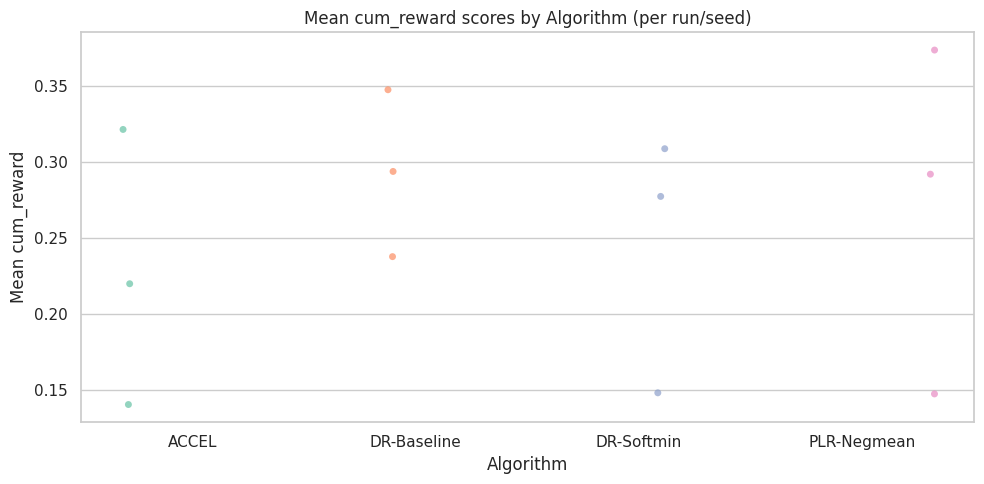

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dot plot of mean cum_reward scores by algo (mean per run_name/seed)
mean_scores = (
    combined
    .groupby(["algo", "run_name", "seed"])["cum_reward"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(10, 5))
sns.stripplot(
    data=mean_scores,
    x="algo",
    y="cum_reward",
    jitter=True,
    alpha=0.7,
    dodge=True,
    palette="Set2"
)
plt.title("Mean cum_reward scores by Algorithm (per run/seed)")
plt.ylabel("Mean cum_reward")
plt.xlabel("Algorithm")
plt.tight_layout()
plt.show()


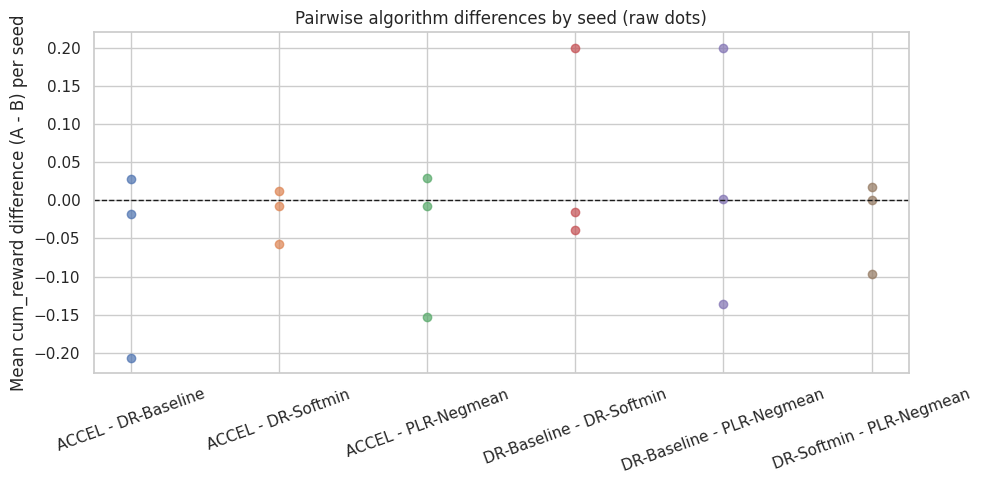

,seed,diff,pair
0,5,0.027553,ACCEL - DR-Baseline
1,6,-0.017793,ACCEL - DR-Baseline
2,7,-0.206542,ACCEL - DR-Baseline
3,5,0.012643,ACCEL - DR-Softmin
4,6,-0.057305,ACCEL - DR-Softmin
5,7,-0.007684,ACCEL - DR-Softmin
6,5,0.029348,ACCEL - PLR-Negmean
7,6,-0.153332,ACCEL - PLR-Negmean
8,7,-0.006967,ACCEL - PLR-Negmean
9,5,-0.014910,DR-Baseline - DR-Softmin


In [41]:
import itertools
import matplotlib.pyplot as plt


# Pairwise differences per seed as dots
seed_algo = combined.groupby(["seed", "algo"])["cum_reward"].mean().reset_index()

pivot = seed_algo.pivot(index="seed", columns="algo", values="cum_reward").dropna()
algos = list(pivot.columns)
pairs = list(itertools.combinations(algos, 2))

rows = []
for a, b in pairs:
    d = (pivot[a] - pivot[b]).reset_index()
    d.columns = ["seed", "diff"]
    d["pair"] = f"{a} - {b}"
    rows.append(d)

pairwise = pd.concat(rows, ignore_index=True)

fig, ax = plt.subplots(figsize=(10, 5))
for i, (pair, grp) in enumerate(pairwise.groupby("pair")):
    x = [i] * len(grp)
    ax.scatter(x, grp["diff"], alpha=0.7, label=pair)

ax.axhline(0.0, color="k", linestyle="--", linewidth=1)
ax.set_xticks(range(len(pairwise["pair"].unique())))
ax.set_xticklabels(pairwise["pair"].unique(), rotation=20)
ax.set_ylabel("Mean cum_reward difference (A - B) per seed")
ax.set_title("Pairwise algorithm differences by seed (raw dots)")
plt.tight_layout()
plt.show()

pairwise.head(20)

# Solve rates

/tmp/ipykernel_6311/2943916006.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


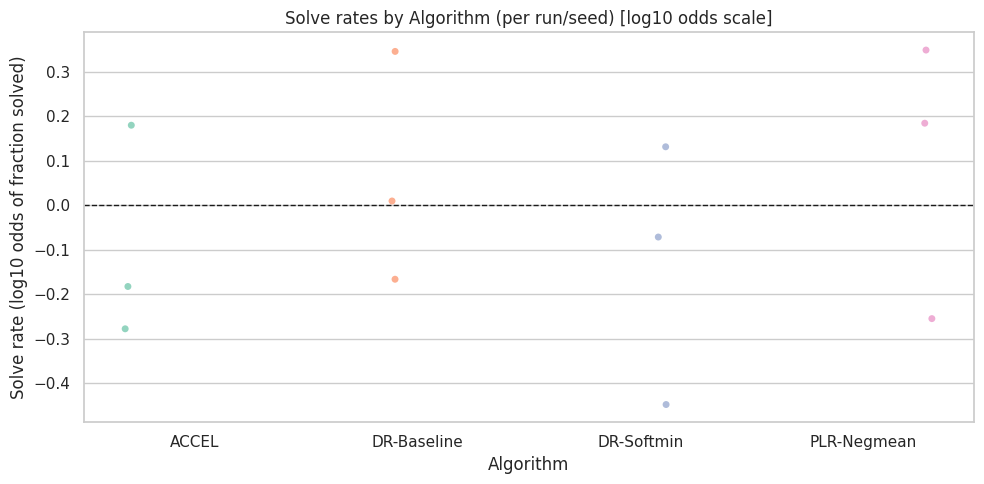

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Compute solve rate: fraction of completed==1 per (algo, run_name, seed)
solve_rates = (
    combined
    .groupby(["algo", "run_name", "seed"])["completed"]
    .mean()
    .reset_index()
    .rename(columns={"completed": "solve_rate"})
)

# To avoid inf/-inf, clip solve_rate to (eps, 1-eps)
eps = 1e-4
solve_rates["solve_rate_clipped"] = solve_rates["solve_rate"].clip(eps, 1 - eps)
# Compute log10 odds: log10(p / (1-p))
solve_rates["solve_rate_log10odds"] = np.log10(solve_rates["solve_rate_clipped"] / (1 - solve_rates["solve_rate_clipped"]))

plt.figure(figsize=(10, 5))
sns.stripplot(
    data=solve_rates,
    x="algo",
    y="solve_rate_log10odds",
    jitter=True,
    alpha=0.7,
    dodge=True,
    palette="Set2"
)
plt.axhline(0.0, color="k", linestyle="--", linewidth=1)  # Add horizontal line at 0
plt.title("Solve rates by Algorithm (per run/seed) [log10 odds scale]")
plt.ylabel("Solve rate (log10 odds of fraction solved)")
plt.xlabel("Algorithm")
plt.tight_layout()
plt.show()


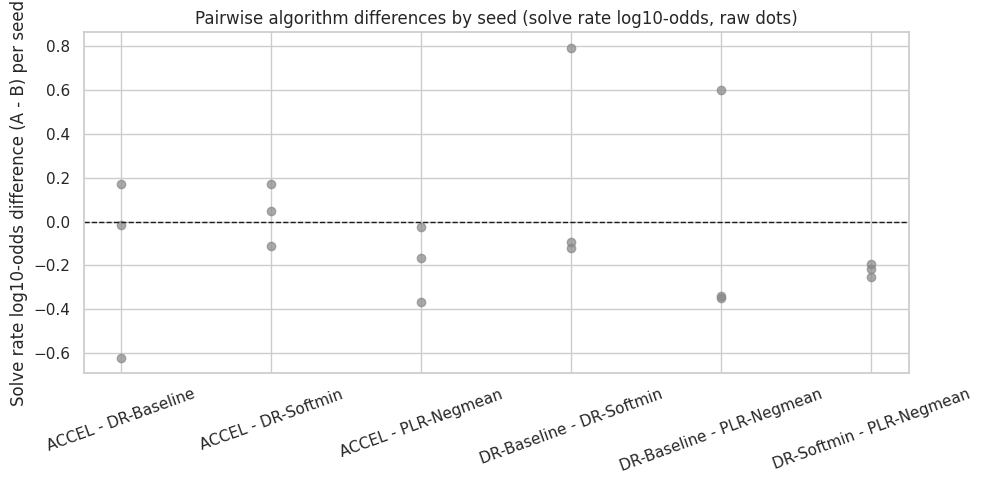

,seed,diff,pair
0,5,0.170159,ACCEL - DR-Baseline
1,6,-0.016273,ACCEL - DR-Baseline
2,7,-0.622920,ACCEL - DR-Baseline
3,5,0.048435,ACCEL - DR-Softmin
4,6,-0.111050,ACCEL - DR-Softmin
5,7,0.170050,ACCEL - DR-Softmin
6,5,-0.168790,ACCEL - PLR-Negmean
7,6,-0.366684,ACCEL - PLR-Negmean
8,7,-0.022865,ACCEL - PLR-Negmean
9,5,-0.121724,DR-Baseline - DR-Softmin


In [43]:
import itertools
import matplotlib.pyplot as plt

# Pairwise differences per seed for solve rates (log10 odds) as dots

# Compute solve rate: fraction of completed==1 per (algo, seed)
solve_rates_seed_algo = (
    combined
    .groupby(["seed", "algo"])["completed"]
    .mean()
    .reset_index()
    .rename(columns={"completed": "solve_rate"})
)

# To avoid inf/-inf, clip solve_rate to (eps, 1-eps)
eps = 1e-4
solve_rates_seed_algo["solve_rate_clipped"] = solve_rates_seed_algo["solve_rate"].clip(eps, 1 - eps)
# Compute log10 odds: log10(p / (1-p))
solve_rates_seed_algo["solve_rate_log10odds"] = np.log10(
    solve_rates_seed_algo["solve_rate_clipped"] / (1 - solve_rates_seed_algo["solve_rate_clipped"])
)

pivot = solve_rates_seed_algo.pivot(index="seed", columns="algo", values="solve_rate_log10odds").dropna()
algos = list(pivot.columns)
pairs = list(itertools.combinations(algos, 2))

rows = []
for a, b in pairs:
    d = (pivot[a] - pivot[b]).reset_index()
    d.columns = ["seed", "diff"]
    d["pair"] = f"{a} - {b}"
    rows.append(d)

pairwise_solve = pd.concat(rows, ignore_index=True)

fig, ax = plt.subplots(figsize=(10, 5))
grey = "#888888"
for i, (pair, grp) in enumerate(pairwise_solve.groupby("pair")):
    x = [i] * len(grp)
    ax.scatter(x, grp["diff"], alpha=0.7, color=grey)

ax.axhline(0.0, color="k", linestyle="--", linewidth=1)
ax.set_xticks(range(len(pairwise_solve["pair"].unique())))
ax.set_xticklabels(pairwise_solve["pair"].unique(), rotation=20)
ax.set_ylabel("Solve rate log10-odds difference (A - B) per seed")
ax.set_title("Pairwise algorithm differences by seed (solve rate log10-odds, raw dots)")
plt.tight_layout()
plt.show()

pairwise_solve.head(20)

# Cumulative reward

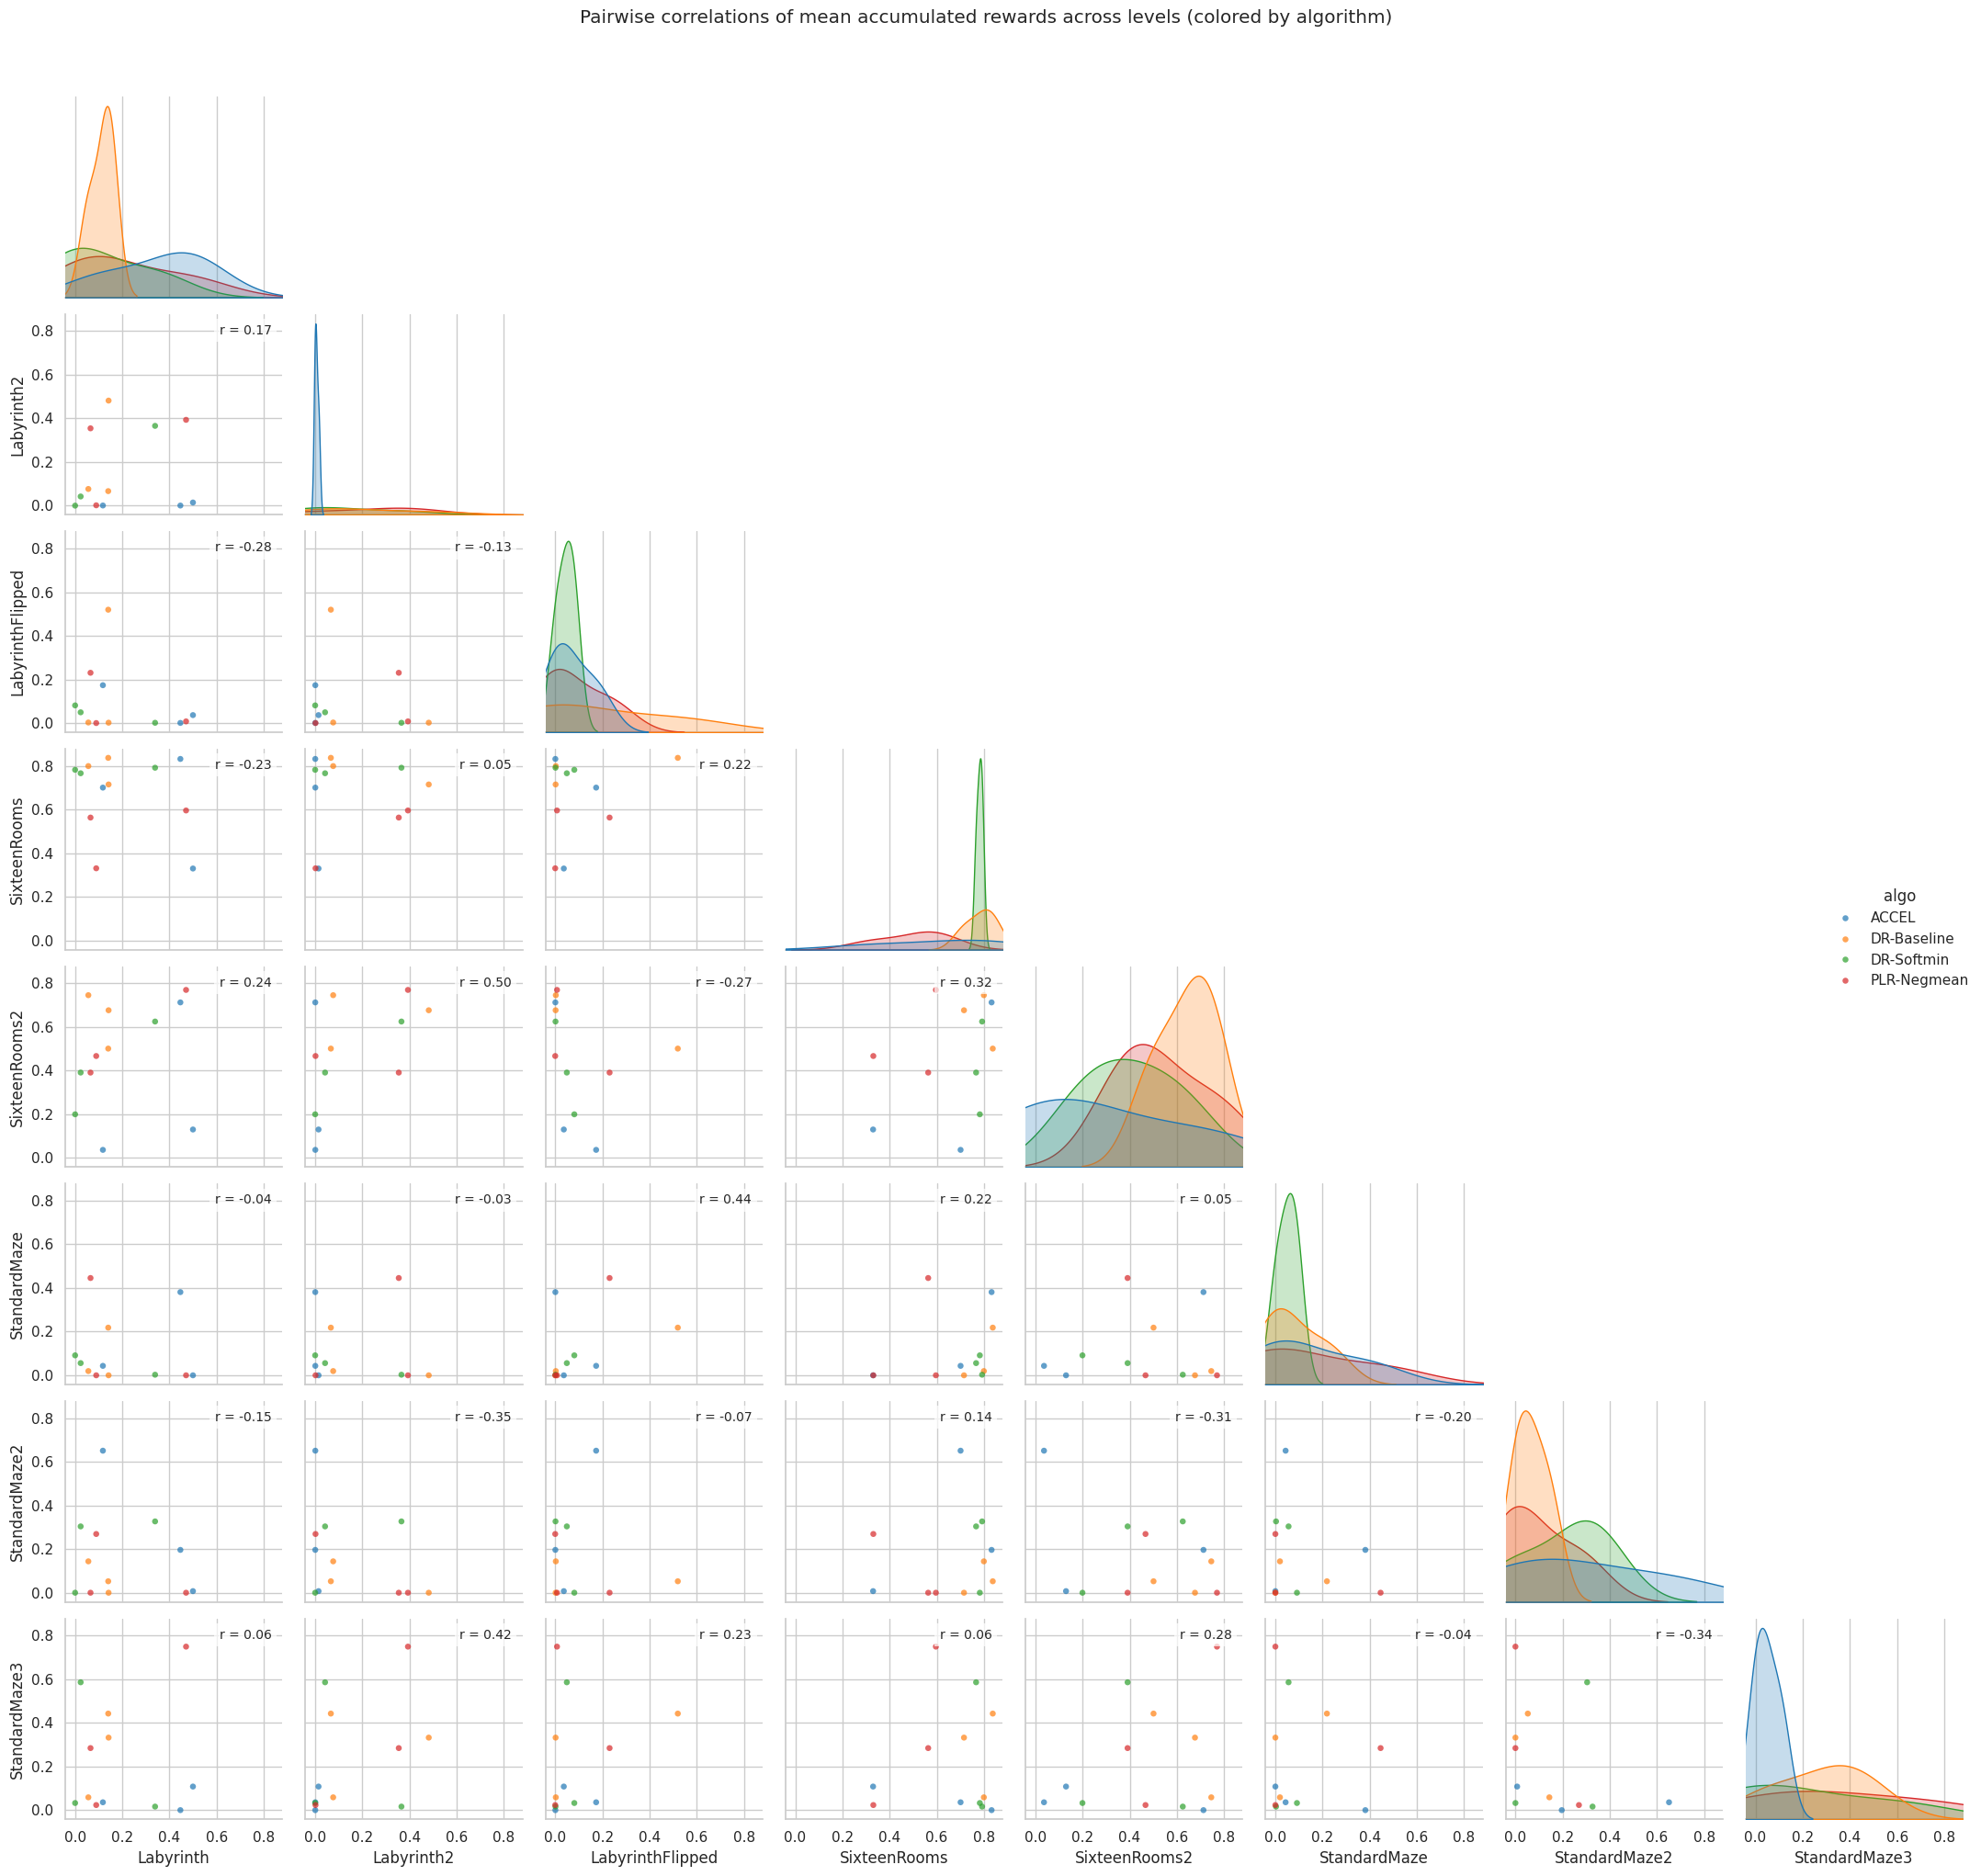

In [44]:
# pyright: reportMissingImports=false
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Mean across attempts per (algo, seed, level_name)
level_means = (
    combined
    .groupby(["algo", "seed", "level_name"])["cum_reward"]
    .mean()
    .reset_index()
)

# Wide format: one row per (algo, seed), columns are level_name means
level_wide = (
    level_means
    .pivot_table(index=["algo", "seed"], columns="level_name", values="cum_reward")
    .reset_index()
)

# Dynamically assign a color palette with as many colors as there are algos
unique_algos = level_wide["algo"].dropna().unique()
n_algos = len(unique_algos)
palette = sns.color_palette("tab10", n_algos)
algo_palette = dict(zip(unique_algos, palette))

level_cols = [c for c in level_wide.columns if c not in ("algo", "seed")]
if len(level_cols) < 2:
    raise ValueError(f"Need at least 2 levels; found {len(level_cols)}")

sns.set(style="whitegrid")
g = sns.pairplot(
    level_wide,
    vars=level_cols,
    hue="algo",
    palette=algo_palette,
    corner=True,
    plot_kws={"alpha": 0.7, "s": 22, "edgecolor": "none"},
    diag_kind="kde"
)
g.fig.suptitle("Pairwise correlations of mean accumulated rewards across levels (colored by algorithm)", y=1.02)

# Global bounds with small margin
vals = level_wide[level_cols].to_numpy(dtype=float)
vmin = np.nanmin(vals); vmax = np.nanmax(vals)
if not np.isfinite(vmin) or not np.isfinite(vmax):
    vmin, vmax = 0.0, 1.0
if vmin == vmax:
    eps = 1e-6
    vmin, vmax = vmin - eps, vmax + eps
margin = 0.05 * (vmax - vmin)
lo, hi = vmin - margin, vmax + margin

# Apply limits to all subplots
for i, row in enumerate(g.axes):
    for j, ax in enumerate(row):
        if ax is None:
            continue
        if i == j:
            ax.set_xlim(lo, hi)   # diagonal: x only
        else:
            ax.set_xlim(lo, hi)
            ax.set_ylim(lo, hi)

# Annotate each off-diagonal subplot with Pearson r (top-right)
for i, xi in enumerate(level_cols):
    for j, yi in enumerate(level_cols):
        if i == j:
            continue
        ax = g.axes[i, j] if hasattr(g, "axes") else None
        if ax is None:
            continue
        sub = level_wide[[xi, yi]].dropna()
        r = np.nan if len(sub) < 2 else sub.corr(method="pearson").iloc[0, 1]
        ax.text(
            0.95, 0.95, f"r = {r:.2f}",
            transform=ax.transAxes, ha="right", va="top",
            fontsize=10,
            bbox=dict(facecolor="white", edgecolor="none", alpha=0.7)
        )

plt.tight_layout()
plt.show()

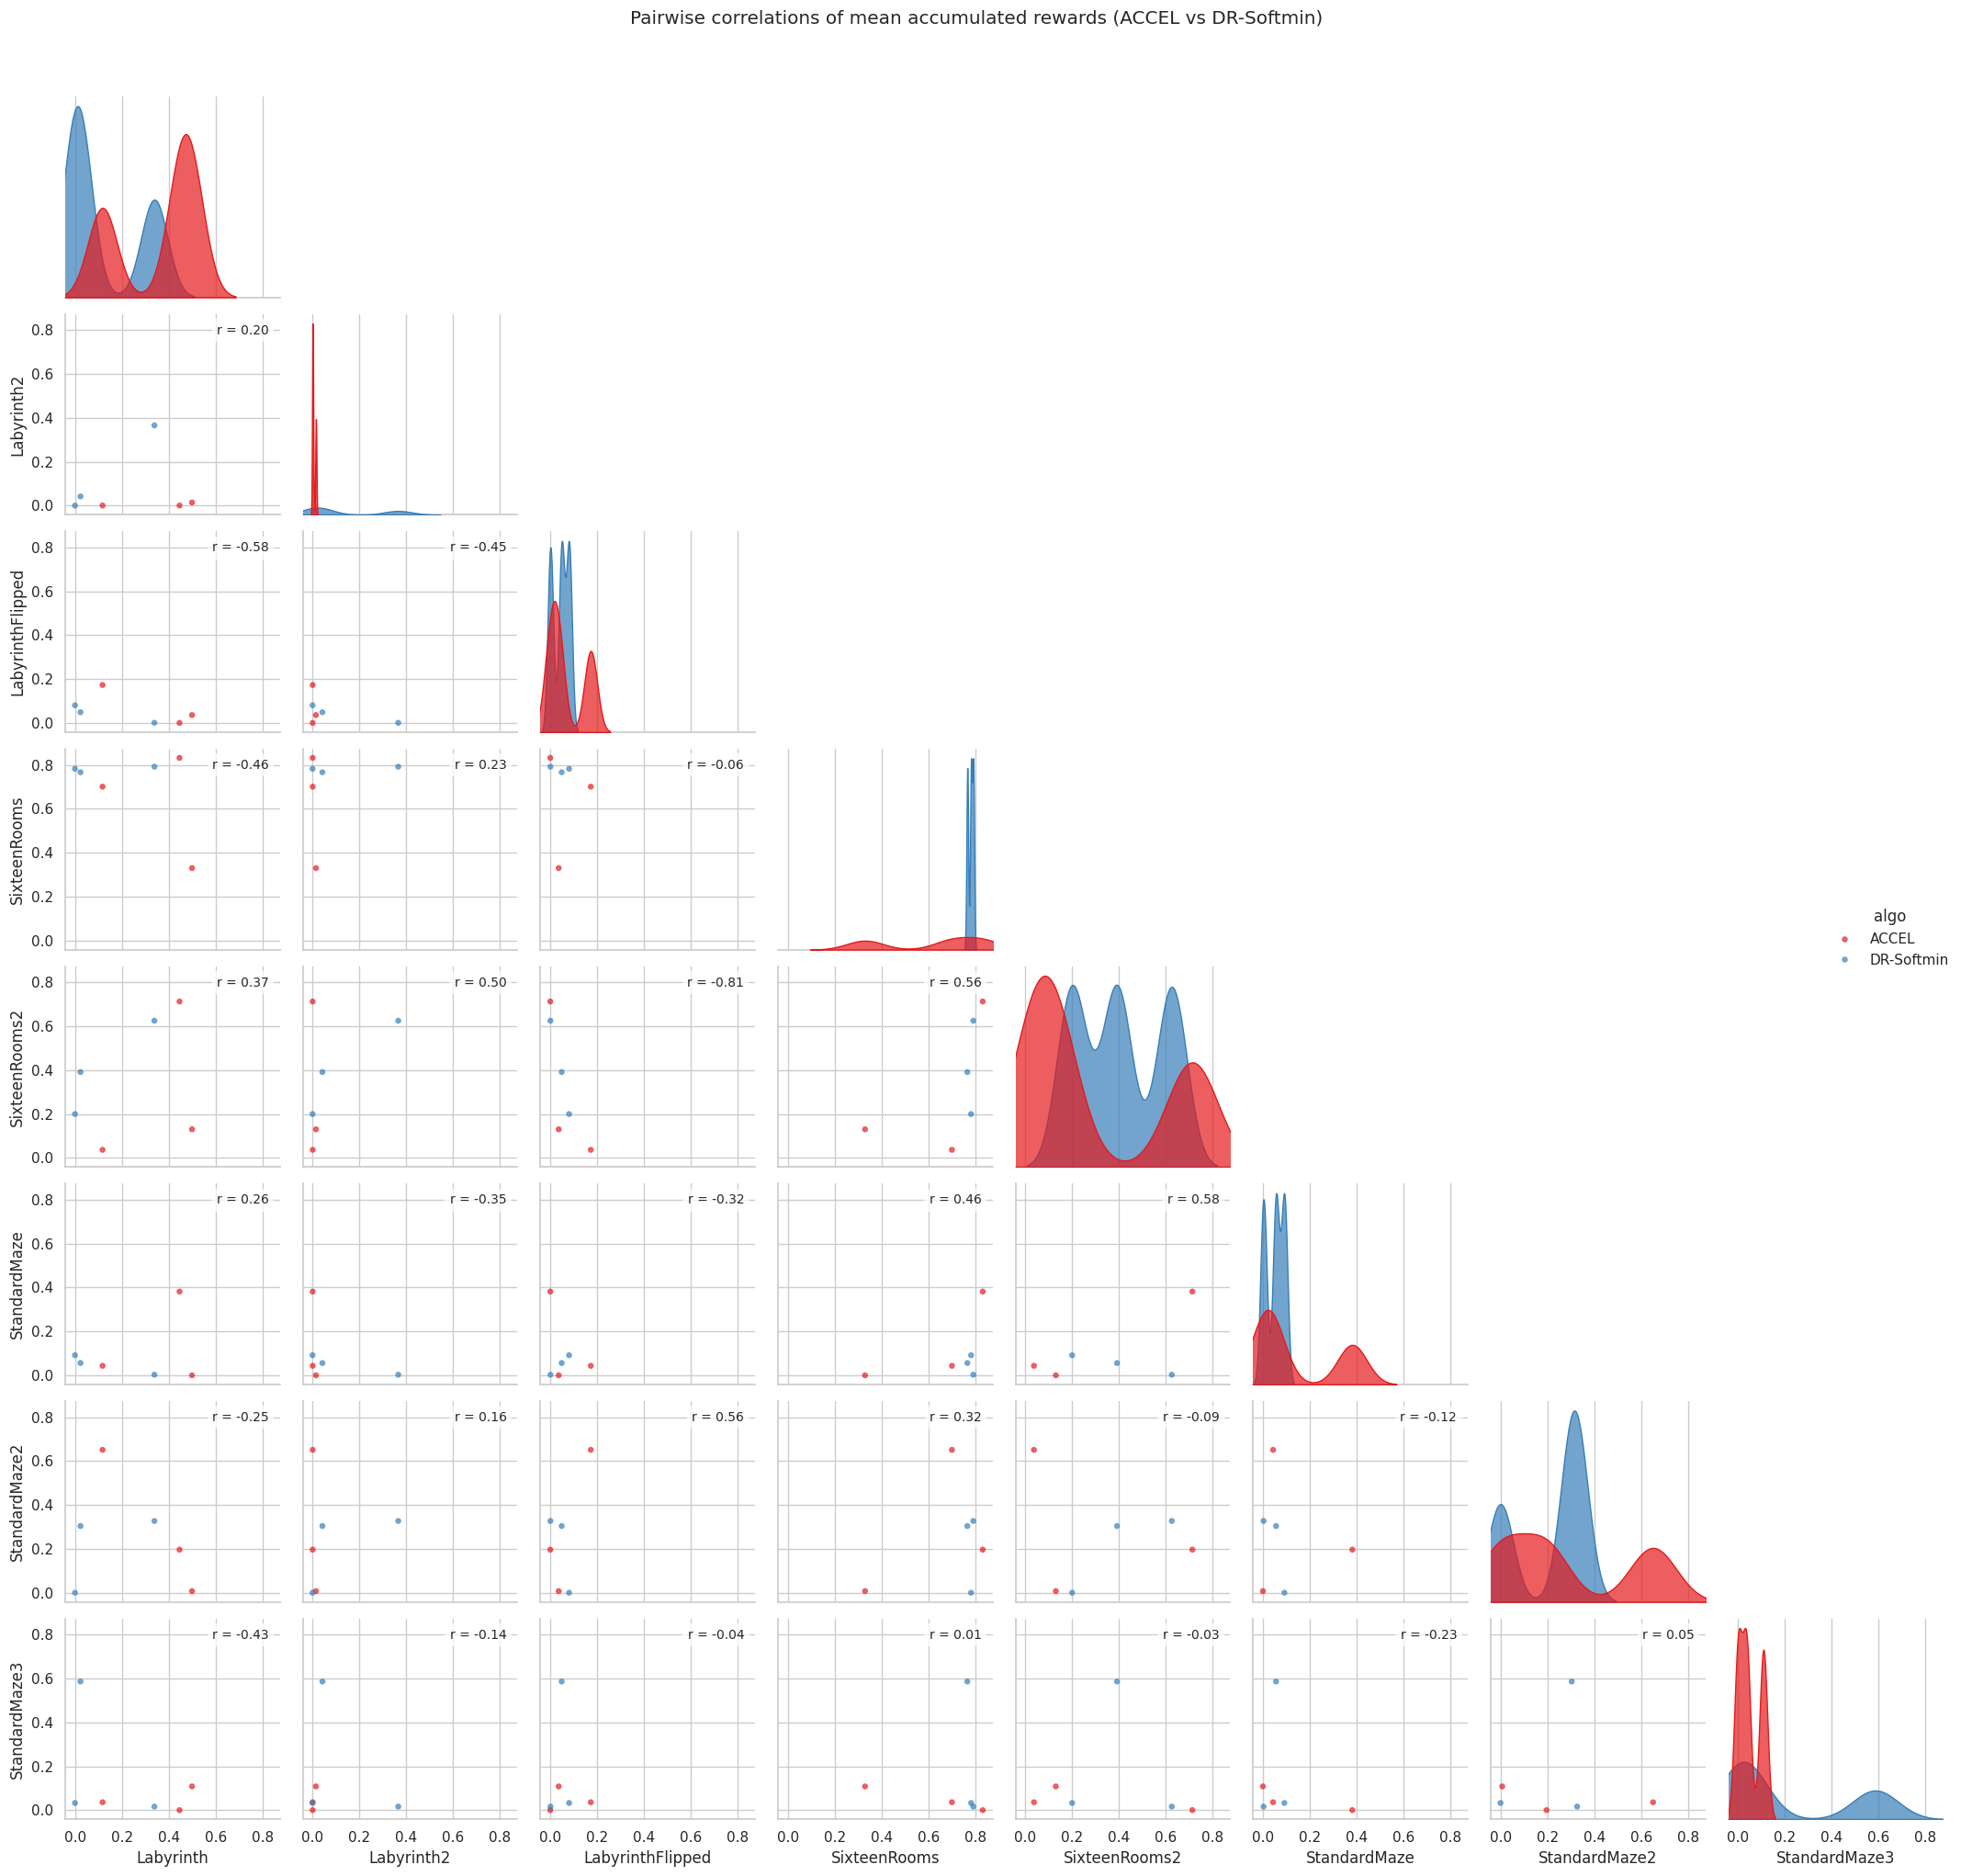

In [45]:
# Filter to just ACCEL and DR-Softmin
algos_to_plot = ["ACCEL", "DR-Softmin"]
df_pair = level_wide[level_wide["algo"].isin(algos_to_plot)]

# Make the density plots more flexible (closer fit to the data)
# Use a smaller bandwidth for KDE, e.g. bw_method=0.3 (smaller = more flexible)
diag_kws = dict(
    bw_method=0.3,      # Lower value = less smoothing, more flexible fit
    fill=True,          # Fill under the KDE curve
    common_norm=False,  # Don't normalize across groups
    alpha=0.7,          # Transparency for overlay
    warn_singular=False # Avoid warnings for singular data
)
# You can further decrease bw_method for even more flexibility, or set to a callable

g2 = sns.pairplot(
    df_pair,
    vars=level_cols,
    hue="algo",
    palette="Set1",
    plot_kws={"alpha": 0.7, "s": 22, "edgecolor": "none"},
    diag_kind="kde",
    diag_kws=diag_kws,
    corner=True,  # Only plot lower triangle
)
g2.fig.suptitle("Pairwise correlations of mean accumulated rewards (ACCEL vs DR-Softmin)", y=1.02)

# Global bounds with small margin
vals2 = df_pair[level_cols].to_numpy(dtype=float)
vmin2 = np.nanmin(vals2); vmax2 = np.nanmax(vals2)
if not np.isfinite(vmin2) or not np.isfinite(vmax2):
    vmin2, vmax2 = 0.0, 1.0
if vmin2 == vmax2:
    eps = 1e-6
    vmin2, vmax2 = vmin2 - eps, vmax2 + eps
margin2 = 0.05 * (vmax2 - vmin2)
lo2, hi2 = vmin2 - margin2, vmax2 + margin2

# Apply limits to all subplots (only lower triangle)
for i, row in enumerate(g2.axes):
    for j, ax in enumerate(row):
        if ax is None:
            continue
        if i == j:
            ax.set_xlim(lo2, hi2)
        elif i > j:
            ax.set_xlim(lo2, hi2)
            ax.set_ylim(lo2, hi2)

# Annotate each off-diagonal subplot with Pearson r (top-right), only lower triangle
for i, xi in enumerate(level_cols):
    for j, yi in enumerate(level_cols):
        if i == j or i < j:
            continue
        ax = g2.axes[i, j] if hasattr(g2, "axes") else None
        if ax is None:
            continue
        sub = df_pair[[xi, yi]].dropna()
        r = np.nan if len(sub) < 2 else sub.corr(method="pearson").iloc[0, 1]
        ax.text(
            0.95, 0.95, f"r = {r:.2f}",
            transform=ax.transAxes, ha="right", va="top",
            fontsize=10,
            bbox=dict(facecolor="white", edgecolor="none", alpha=0.7)
        )

plt.tight_layout()
plt.show()


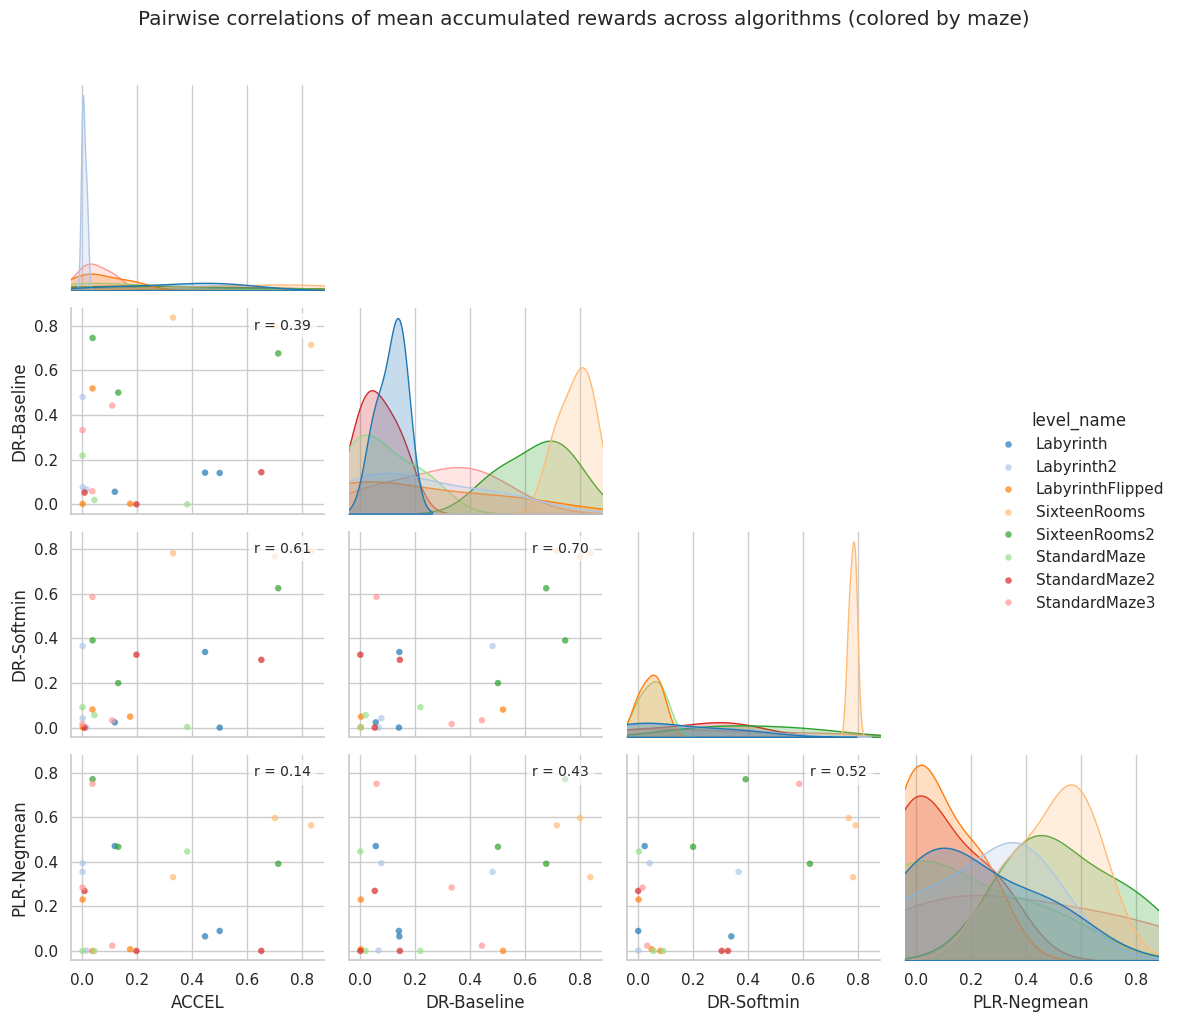

In [46]:
# pyright: reportMissingImports=false
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Mean across attempts per (algo, seed, level_name)
level_means = (
    combined
    .groupby(["algo", "seed", "level_name"])["cum_reward"]
    .mean()
    .reset_index()
)

# Wide format: one row per (level_name, seed), columns are algos' means
algo_wide = (
    level_means
    .pivot_table(index=["level_name", "seed"], columns="algo", values="cum_reward")
    .reset_index()
)

# Dynamically assign a color palette with as many colors as there are mazes
unique_mazes = algo_wide["level_name"].dropna().unique()
n_mazes = len(unique_mazes)
palette = sns.color_palette("tab20", n_mazes)
maze_palette = dict(zip(unique_mazes, palette))

algo_cols = [c for c in algo_wide.columns if c not in ("level_name", "seed")]
if len(algo_cols) < 2:
    raise ValueError(f"Need at least 2 algos; found {len(algo_cols)}")

sns.set(style="whitegrid")
g = sns.pairplot(
    algo_wide,
    vars=algo_cols,
    hue="level_name",
    palette=maze_palette,
    corner=True,
    plot_kws={"alpha": 0.7, "s": 22, "edgecolor": "none"},
    diag_kind="kde"
)
g.fig.suptitle("Pairwise correlations of mean accumulated rewards across algorithms (colored by maze)", y=1.02)

# Global bounds with small margin
vals = algo_wide[algo_cols].to_numpy(dtype=float)
vmin = np.nanmin(vals); vmax = np.nanmax(vals)
if not np.isfinite(vmin) or not np.isfinite(vmax):
    vmin, vmax = 0.0, 1.0
if vmin == vmax:
    eps = 1e-6
    vmin, vmax = vmin - eps, vmax + eps
margin = 0.05 * (vmax - vmin)
lo, hi = vmin - margin, vmax + margin

# Apply limits to all subplots
for i, row in enumerate(g.axes):
    for j, ax in enumerate(row):
        if ax is None:
            continue
        if i == j:
            ax.set_xlim(lo, hi)   # diagonal: x only
        else:
            ax.set_xlim(lo, hi)
            ax.set_ylim(lo, hi)

# Annotate each off-diagonal subplot with Pearson r (top-right)
for i, xi in enumerate(algo_cols):
    for j, yi in enumerate(algo_cols):
        if i == j:
            continue
        ax = g.axes[i, j] if hasattr(g, "axes") else None
        if ax is None:
            continue
        sub = algo_wide[[xi, yi]].dropna()
        r = np.nan if len(sub) < 2 else sub.corr(method="pearson").iloc[0, 1]
        ax.text(
            0.95, 0.95, f"r = {r:.2f}",
            transform=ax.transAxes, ha="right", va="top",
            fontsize=10,
            bbox=dict(facecolor="white", edgecolor="none", alpha=0.7)
        )

plt.tight_layout()
plt.show()

# Solve Rates

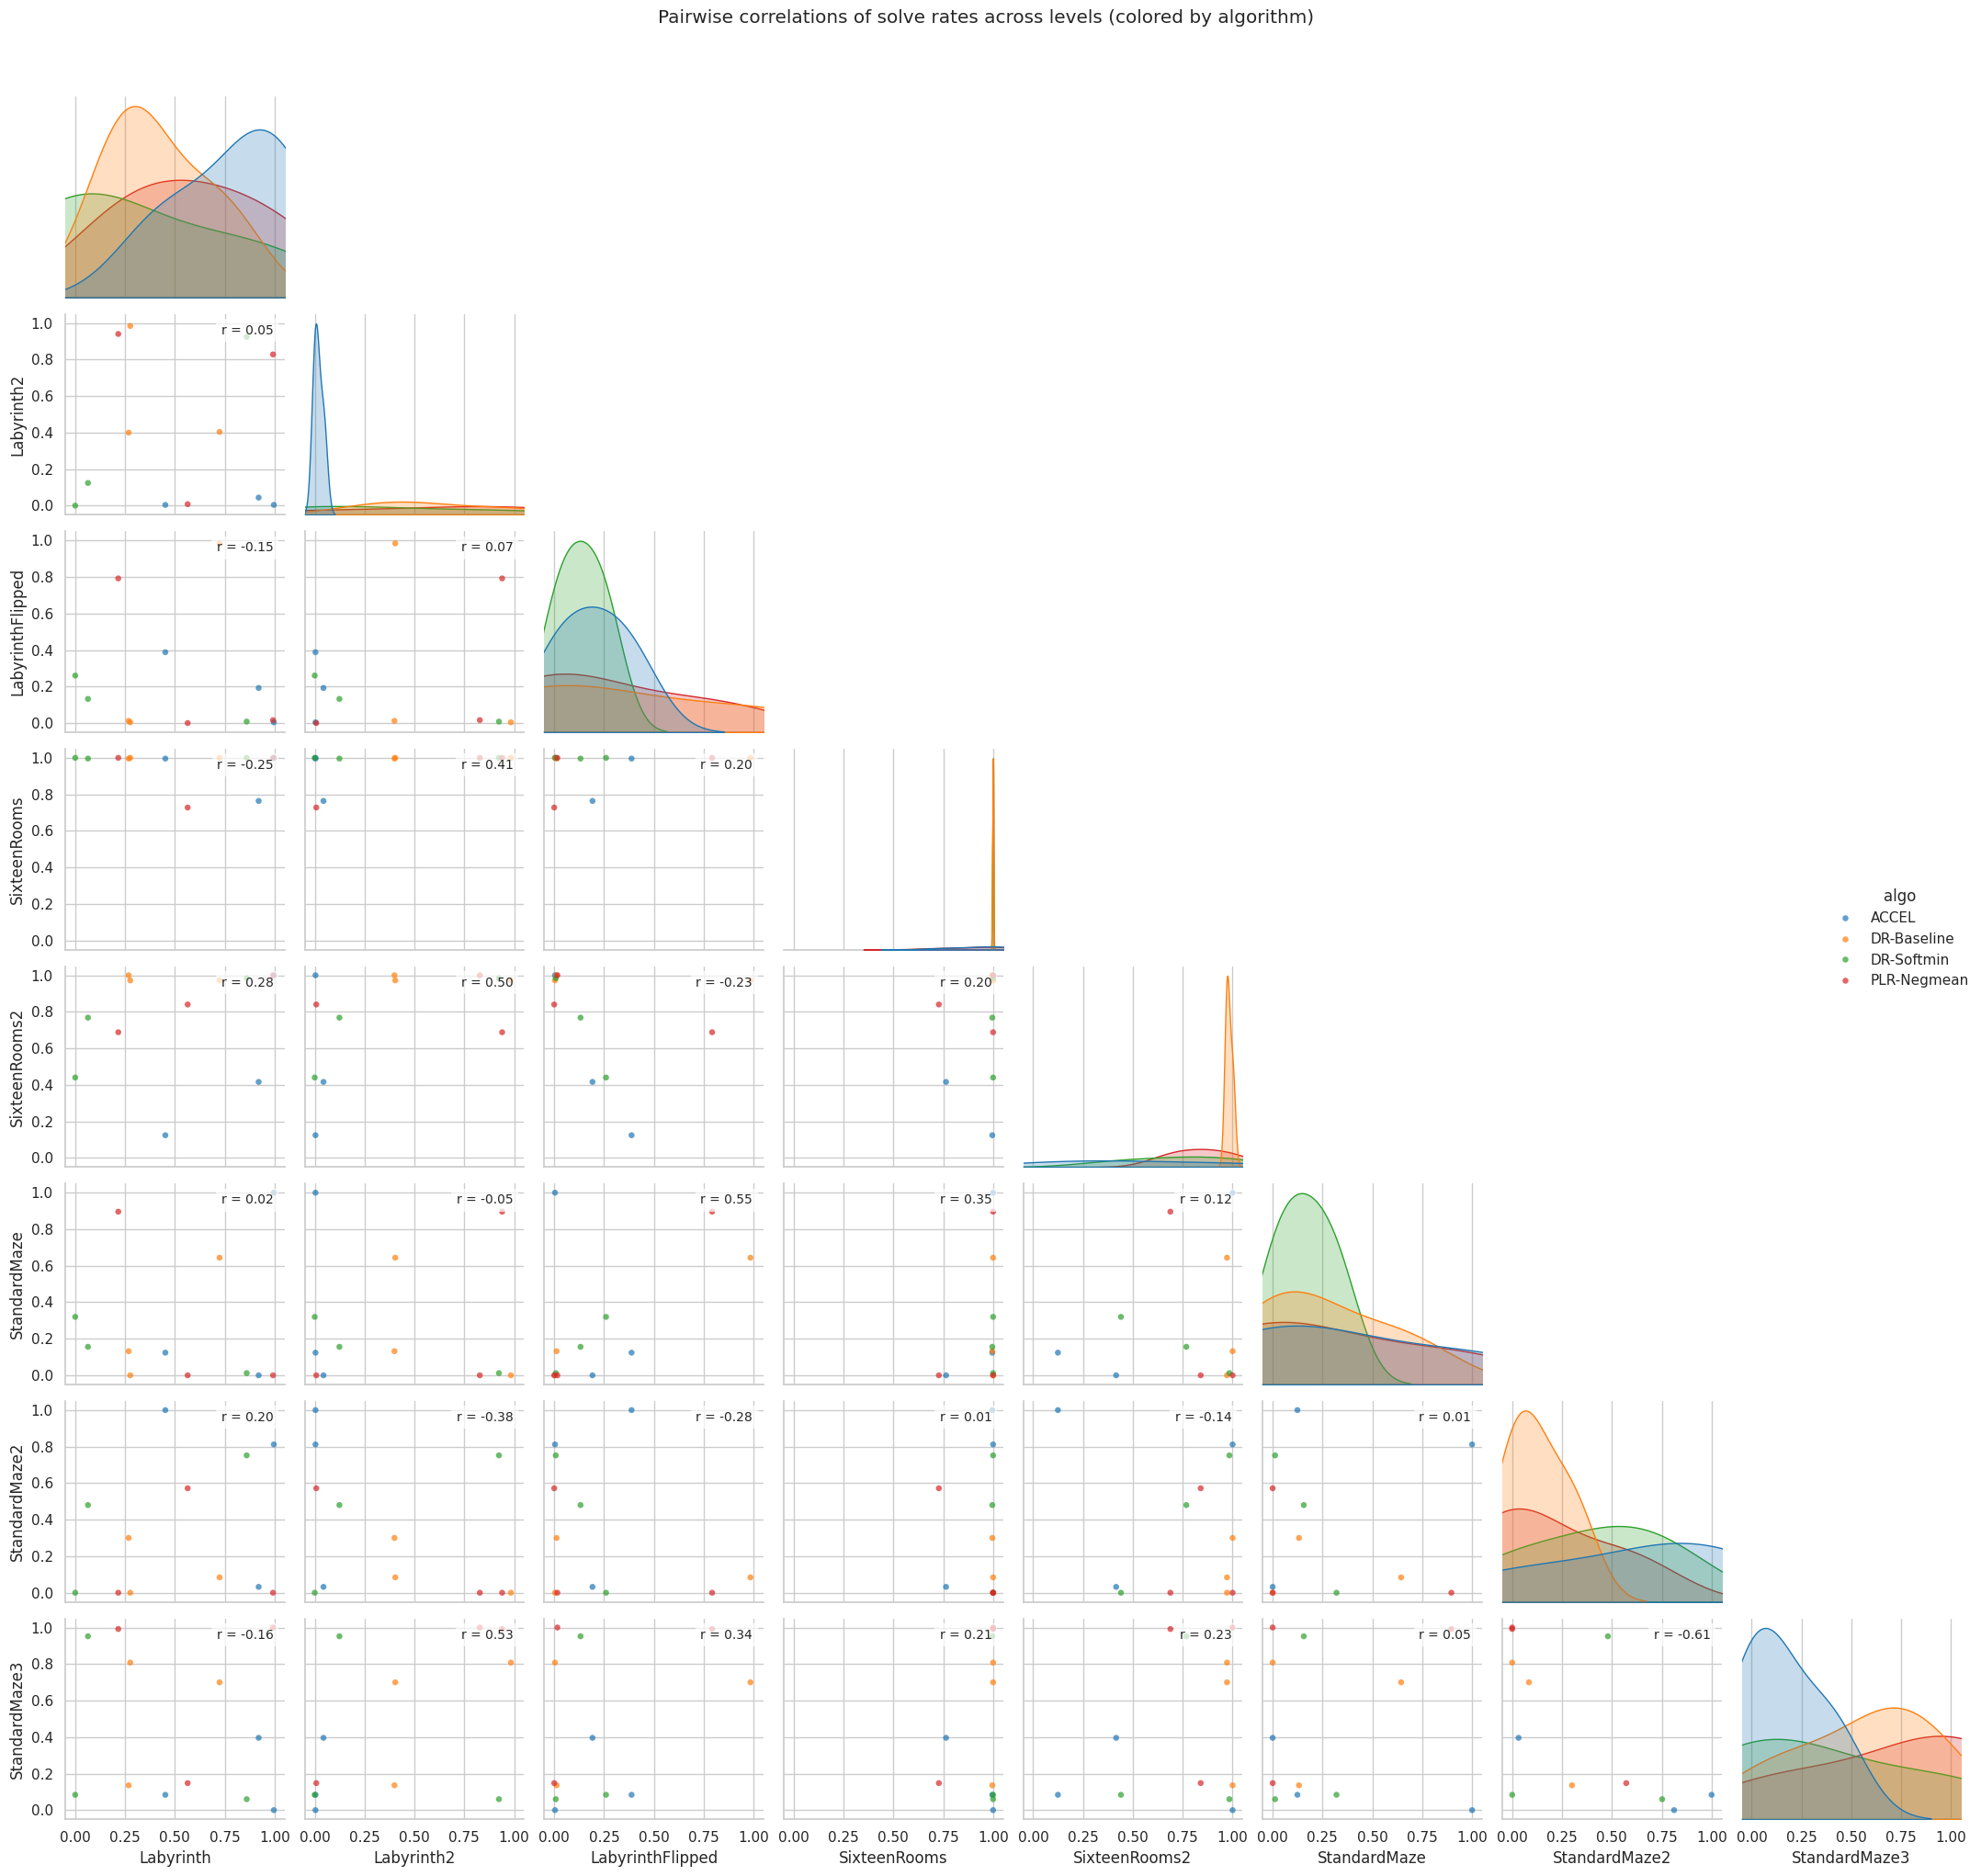

In [47]:
# pyright: reportMissingImports=false
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Compute solve rate: fraction of attempts with cum_reward >= 1.0
solve_thresh = 0
level_solves = (
    combined
    .assign(solved=lambda df: df["cum_reward"] > solve_thresh)
    .groupby(["algo", "seed", "level_name"])["solved"]
    .mean()
    .reset_index()
    .rename(columns={"solved": "solve_rate"})
)

# Wide format: one row per (algo, seed), columns are level_name solve rates
level_wide = (
    level_solves
    .pivot_table(index=["algo", "seed"], columns="level_name", values="solve_rate")
    .reset_index()
)

# Dynamically assign a color palette with as many colors as there are algos
unique_algos = level_wide["algo"].dropna().unique()
n_algos = len(unique_algos)
palette = sns.color_palette("tab10", n_algos)
algo_palette = dict(zip(unique_algos, palette))

level_cols = [c for c in level_wide.columns if c not in ("algo", "seed")]
if len(level_cols) < 2:
    raise ValueError(f"Need at least 2 levels; found {len(level_cols)}")

sns.set(style="whitegrid")
g = sns.pairplot(
    level_wide,
    vars=level_cols,
    hue="algo",
    palette=algo_palette,
    corner=True,
    plot_kws={"alpha": 0.7, "s": 22, "edgecolor": "none"},
    diag_kind="kde"
)
g.fig.suptitle("Pairwise correlations of solve rates across levels (colored by algorithm)", y=1.02)

# Global bounds with small margin
vals = level_wide[level_cols].to_numpy(dtype=float)
vmin = np.nanmin(vals); vmax = np.nanmax(vals)
if not np.isfinite(vmin) or not np.isfinite(vmax):
    vmin, vmax = 0.0, 1.0
if vmin == vmax:
    eps = 1e-6
    vmin, vmax = vmin - eps, vmax + eps
margin = 0.05 * (vmax - vmin)
lo, hi = vmin - margin, vmax + margin

# Apply limits to all subplots
for i, row in enumerate(g.axes):
    for j, ax in enumerate(row):
        if ax is None:
            continue
        if i == j:
            ax.set_xlim(lo, hi)   # diagonal: x only
        else:
            ax.set_xlim(lo, hi)
            ax.set_ylim(lo, hi)

# Annotate each off-diagonal subplot with Pearson r (top-right)
for i, xi in enumerate(level_cols):
    for j, yi in enumerate(level_cols):
        if i == j:
            continue
        ax = g.axes[i, j] if hasattr(g, "axes") else None
        if ax is None:
            continue
        sub = level_wide[[xi, yi]].dropna()
        r = np.nan if len(sub) < 2 else sub.corr(method="pearson").iloc[0, 1]
        ax.text(
            0.95, 0.95, f"r = {r:.2f}",
            transform=ax.transAxes, ha="right", va="top",
            fontsize=10,
            bbox=dict(facecolor="white", edgecolor="none", alpha=0.7)
        )

plt.tight_layout()
plt.show()

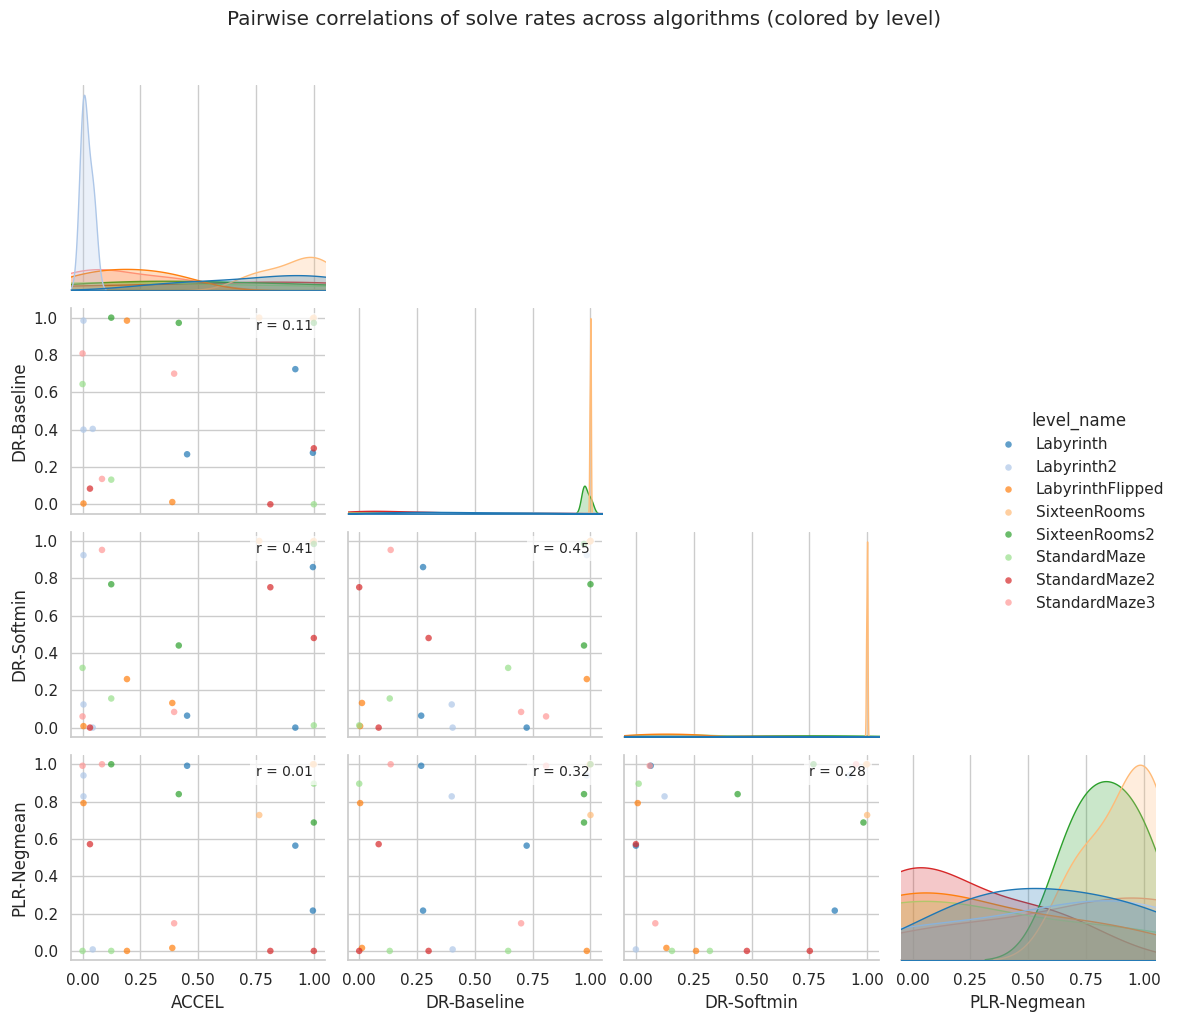

In [48]:
# pyright: reportMissingImports=false
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Compute solve rate: fraction of attempts with cum_reward >= 1.0
solve_thresh = 0
algo_solves = (
    combined
    .assign(solved=lambda df: df["cum_reward"] > solve_thresh)
    .groupby(["level_name", "seed", "algo"])["solved"]
    .mean()
    .reset_index()
    .rename(columns={"solved": "solve_rate"})
)

# Wide format: one row per (level_name, seed), columns are algo solve rates
algo_wide = (
    algo_solves
    .pivot_table(index=["level_name", "seed"], columns="algo", values="solve_rate")
    .reset_index()
)

# Dynamically assign a color palette with as many colors as there are algos
unique_algos = [c for c in algo_wide.columns if c not in ("level_name", "seed")]
n_algos = len(unique_algos)
palette = sns.color_palette("tab10", n_algos)
algo_palette = dict(zip(unique_algos, palette))

algo_cols = unique_algos
if len(algo_cols) < 2:
    raise ValueError(f"Need at least 2 algos; found {len(algo_cols)}")

sns.set(style="whitegrid")
g = sns.pairplot(
    algo_wide,
    vars=algo_cols,
    hue="level_name",
    palette="tab20",
    corner=True,
    plot_kws={"alpha": 0.7, "s": 22, "edgecolor": "none"},
    diag_kind="kde"
)
g.fig.suptitle("Pairwise correlations of solve rates across algorithms (colored by level)", y=1.02)

# Global bounds with small margin
vals = algo_wide[algo_cols].to_numpy(dtype=float)
vmin = np.nanmin(vals); vmax = np.nanmax(vals)
if not np.isfinite(vmin) or not np.isfinite(vmax):
    vmin, vmax = 0.0, 1.0
if vmin == vmax:
    eps = 1e-6
    vmin, vmax = vmin - eps, vmax + eps
margin = 0.05 * (vmax - vmin)
lo, hi = vmin - margin, vmax + margin

# Apply limits to all subplots
for i, row in enumerate(g.axes):
    for j, ax in enumerate(row):
        if ax is None:
            continue
        if i == j:
            ax.set_xlim(lo, hi)   # diagonal: x only
        else:
            ax.set_xlim(lo, hi)
            ax.set_ylim(lo, hi)

# Annotate each off-diagonal subplot with Pearson r (top-right)
for i, xi in enumerate(algo_cols):
    for j, yi in enumerate(algo_cols):
        if i == j:
            continue
        ax = g.axes[i, j] if hasattr(g, "axes") else None
        if ax is None:
            continue
        sub = algo_wide[[xi, yi]].dropna()
        r = np.nan if len(sub) < 2 else sub.corr(method="pearson").iloc[0, 1]
        ax.text(
            0.95, 0.95, f"r = {r:.2f}",
            transform=ax.transAxes, ha="right", va="top",
            fontsize=10,
            bbox=dict(facecolor="white", edgecolor="none", alpha=0.7)
        )

plt.tight_layout()
plt.show()